<a href="https://colab.research.google.com/github/zlximon/Tensorflow_DL/blob/master/CNN_and_computer_vision_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-05-09 16:36:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.5.128, 64.233.184.128, 74.125.133.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.5.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  43.7MB/s    in 2.4s    

2022-05-09 16:36:23 (43.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



#inspect the data

In [3]:
!ls pizza_steak 

test  train


In [4]:
import os 
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [5]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))#getting our class names 
print(class_names)

['pizza' 'steak']


In [6]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def random_img(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


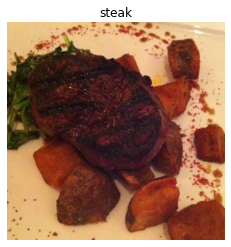

In [8]:
img=random_img(target_dir="pizza_steak/train/",target_class="steak")

In [9]:
tf.constant(img)   
img.shape# its return width ,height,color channels (RGB)


(512, 512, 3)

In [12]:
#first model 
import tensorflow as tf
from tensorflow.keras.preprocessing.image  import ImageDataGenerator
tf.random.set_seed(42)
#processing data 
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)
train_dir="/content/pizza_steak/train"
test_dir="pizza_steak/test"
train_data=train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
valid_data=valid_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


in this exmaple we divided our imges to batches that our model see images in batches

In [21]:
#creating model 
model1=tf.keras.Sequential([
tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.MaxPool2D(2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense( 1,activation="sigmoid")
])
model1.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history1=model1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 27s 362ms/step - loss: 0.5675 - accuracy: 0.7113 - val_loss: 0.4518 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 16s 348ms/step - loss: 0.4695 - accuracy: 0.7900 - val_loss: 0.4417 - val_accuracy: 0.8013
Epoch 3/5
47/47 [==============================] - 16s 350ms/step - loss: 0.4283 - accuracy: 0.8193 - val_loss: 0.3992 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 17s 366ms/step - loss: 0.4072 - accuracy: 0.8307 - val_loss: 0.4943 - val_accuracy: 0.7800
Epoch 5/5
47/47 [==============================] - 17s 361ms/step - loss: 0.3586 - accuracy: 0.8400 - val_loss: 0.3604 - val_accuracy: 0.8420
